# Final Project

## Introduction

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

## Initialization

In [288]:
# Load up necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils import shuffle

In [2]:
# Create dataframes
df_contract = pd.read_csv(r"C:\Users\harve\Downloads\final_provider\contract.csv")

df_internet = pd.read_csv(r"C:\Users\harve\Downloads\final_provider\internet.csv")

df_personal = pd.read_csv(r"C:\Users\harve\Downloads\final_provider\personal.csv")

df_phone = pd.read_csv(r"C:\Users\harve\Downloads\final_provider\phone.csv")

## Preprocessing

### Visualize dataframes

In [3]:
# Visualize df_contract
df_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [4]:
# Visualize df_internet
df_internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [5]:
# Visualize df_personal
df_personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [6]:
# Visualize df_phone
df_phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


### Standardize column names

#### df_contract

In [7]:
# Visualize column names
df_contract.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [8]:
# Convert column names to snake case and lower case
df_contract = df_contract.rename(columns={
'customerID' : 'customer_id',
    'BeginDate' : 'begin_date',
    'EndDate' : 'end_date',
    'Type' : 'type',
    'PaperlessBilling' : 'paperless_billing',
    'PaymentMethod' : 'payment_method',
    'MonthlyCharges' : 'monthly_charges',
    'TotalCharges' : 'total_charges'
})

In [9]:
# Visualize column names
df_contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

#### df_internet

In [10]:
# Visualize column names
df_internet.columns

Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [11]:
# Convert column names to snake case and lower case
df_internet = df_internet.rename(columns={
    'customerID': 'customer_id',
    'InternetService' : 'internet_service',
    'OnlineSecurity' : 'online_security',
    'OnlineBackup' : 'online_backup',
    'DeviceProtection' : 'device_protection',
    'TechSupport' : 'tech_support',
    'StreamingTV' : 'streaming_tv',
    'StreamingMovies' : 'streaming_movies'
})

In [12]:
# Visualize column names
df_internet.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

#### df_personal

In [13]:
# Visualize column names
df_personal.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [14]:
# Convert column names to snake case and lower case
df_personal = df_personal.rename(columns={
    'customerID' : 'customer_id',
    'SeniorCitizen' : 'senior_citizen',
    'Partner' : 'partner',
    'Dependents' : 'dependents'
})

In [15]:
# Visualize column names
df_personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

#### df_phone 

In [16]:
# Visualize column names
df_phone.columns

Index(['customerID', 'MultipleLines'], dtype='object')

In [17]:
# Convert column names to snake case and lower case
df_phone = df_phone.rename(columns={
    'customerID' : 'customer_id',
    'MultipleLines' : 'multiple_lines'
})

In [18]:
# Visualize column names
df_phone.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

All column names have been standardized and the datasets are ready to be merged into one dataframe.

### Merge dataframes

In [19]:
# Merge datasets into one dataframe
df = df_contract.merge(df_internet, on='customer_id', how='outer').merge(df_personal,  on='customer_id', how='outer').merge(df_phone,  on='customer_id', how='outer')

In [20]:
# Visualize df
df

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No,Yes


### Date types

In [22]:
# Visualize df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   internet_service   5517 non-null   object 
 9   online_security    5517 non-null   object 
 10  online_backup      5517 non-null   object 
 11  device_protection  5517 non-null   object 
 12  tech_support       5517 non-null   object 
 13  streaming_tv       5517 non-null   object 
 14  streaming_movies   5517 non-null   object 
 15  gender             7043 non-null   object 
 16  senior_citizen     7043 

In [92]:
# Convert data types
df['begin_date'] = pd.to_datetime(df['begin_date'], format= '%Y-%m-%d')
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

In [24]:
# Visualize data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   internet_service   5517 non-null   object        
 9   online_security    5517 non-null   object        
 10  online_backup      5517 non-null   object        
 11  device_protection  5517 non-null   object        
 12  tech_support       5517 non-null   object        
 13  streaming_tv       5517 non-null   object        
 14  streamin

### Duplicates

In [25]:
# Check for duplicates
df.duplicated().value_counts()

False    7043
dtype: int64

There are no duplicates in our dataframe

### Additional columns

In [264]:
# Create column to increase features 
df['begin_year'] = df['begin_date'].dt.year


### Missing values

In [26]:
# Visualize rows with missing data
df[df['internet_service'].isna() == True]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
11,7469-LKBCI,2018-10-01,No,Two year,No,Credit card (automatic),18.95,326.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,No,No,No
16,8191-XWSZG,2015-10-01,No,One year,No,Mailed check,20.65,1022.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,0,No,No,No
21,1680-VDCWW,2019-02-01,No,One year,No,Bank transfer (automatic),19.80,202.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,No,No
22,1066-JKSGK,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Mailed check,20.15,20.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,No,No,No
33,7310-EGVHZ,2020-01-01,No,Month-to-month,No,Bank transfer (automatic),20.20,20.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,2015-11-01,No,Two year,No,Bank transfer (automatic),20.65,1020.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,0,No,No,No
7019,9710-NJERN,2016-11-01,No,Two year,No,Mailed check,20.15,826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,0,No,No,No
7020,9837-FWLCH,2019-02-01,No,Month-to-month,Yes,Electronic check,19.20,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,Yes,No
7030,0871-OPBXW,2019-12-01,No,Month-to-month,Yes,Mailed check,20.05,39.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,0,No,No,No


In [27]:
# Fill in missing values
affected_columns = ['internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support','streaming_tv', 'streaming_movies']
df[affected_columns] = df[affected_columns].fillna('nil')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   internet_service   7043 non-null   object        
 9   online_security    7043 non-null   object        
 10  online_backup      7043 non-null   object        
 11  device_protection  7043 non-null   object        
 12  tech_support       7043 non-null   object        
 13  streaming_tv       7043 non-null   object        
 14  streamin

In [29]:
df['multiple_lines'].isna().value_counts()

False    6361
True      682
Name: multiple_lines, dtype: int64

In [30]:
df[df['multiple_lines'].isna() == True].head(20)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9,DSL,Yes,No,No,No,No,No,Female,0,No,No,NaN
20,8779-QRDMV,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,39.65,39.65,DSL,No,No,Yes,No,No,Yes,Male,1,No,No,NaN
27,8665-UTDHZ,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Electronic check,30.20,30.2,DSL,No,Yes,No,No,No,No,Male,0,Yes,Yes,NaN
62,0526-SXDJP,2014-02-01,No,Two year,No,Bank transfer (automatic),42.10,2962,DSL,Yes,Yes,Yes,No,No,No,Male,0,Yes,No,NaN
81,8108-UXRQN,2019-03-01,No,Month-to-month,No,Electronic check,50.55,565.35,DSL,Yes,No,No,No,Yes,Yes,Female,0,Yes,Yes,NaN
89,3016-KSVCP,2017-09-01,No,Month-to-month,No,Mailed check,33.75,1009.25,DSL,No,No,No,No,Yes,No,Male,0,Yes,No,NaN
103,5386-THSLQ,2014-08-01,No,One year,No,Bank transfer (automatic),45.55,3027.25,DSL,No,Yes,Yes,No,Yes,No,Female,1,Yes,No,NaN
105,6180-YBIQI,2019-09-01,No,Month-to-month,No,Mailed check,24.30,100.2,DSL,No,No,No,No,No,No,Male,0,No,No,NaN


In [31]:
# Fill missing values in multiple_lines column
df['multiple_lines'].fillna('unknown', inplace=True)
df['multiple_lines'].isna().value_counts()

False    7043
Name: multiple_lines, dtype: int64

In [94]:
# VIsualize description of total charges column
df['total_charges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: total_charges, dtype: float64

In [98]:
# Fill missing values with median
df['total_charges'].fillna(df['total_charges'].median(), inplace=True)

In the total values column we can see a big difference between the mean and the median. This could be because a small group of people spend way more on the service than others. So to have a fair representation of the values, we filled the missing values with the median value.

The data has been preprocessed and is ready for exploratory data analysis. There was no clear correlation between columns that had missing values and columns where the answer was 'no'. So for I've filled those columns with place holders.

# Work Plan

## Exploratory Data Analysis:
Here I'm going to find correlation between different kinds of users and their behaviours. From the preliminary analysis we can see that there are internet and none internet users. Are internet users staying longer on the service or do they make the majority of lost client?

## Working with Models:
This is a classification task and so i'll make use of classification models. I'll try some different models and go with the best option. AUC-ROC score will be the main metric for jusdging the models because this will take into account the confusion matrix of true and false postitves and negatives. Accuracy metric will also be used to supplement and help us better understand the accuracy of the models in real world tasks.

## Conclusion:
In this section I sum up and summarize the results of my analysis.

## Exploratory Data Analysis

### Explore dataset with lost users to understand the trend

In [32]:
# Create lost users dataset
lost_users = df[df['end_date'] != 'No']

In [33]:
# Visualize dataset
display(lost_users.head(20))
print(lost_users.info())

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5,Fiber optic,No,No,Yes,No,Yes,Yes,Female,0,No,No,Yes
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,Fiber optic,No,No,Yes,Yes,Yes,Yes,Female,0,Yes,No,Yes
13,0280-XJGEX,2015-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Fiber optic,No,Yes,Yes,No,Yes,Yes,Male,0,No,No,Yes
18,4190-MFLUW,2019-01-01,2019-11-01 00:00:00,Month-to-month,No,Credit card (automatic),55.20,528.35,DSL,No,No,Yes,Yes,No,No,Female,0,Yes,Yes,No
20,8779-QRDMV,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,39.65,39.65,DSL,No,No,Yes,No,No,Yes,Male,1,No,No,unknown
22,1066-JKSGK,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Mailed check,20.15,20.15,nil,nil,nil,nil,nil,nil,nil,Male,0,No,No,No
26,6467-CHFZW,2015-12-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.35,4749.15,Fiber optic,No,Yes,No,No,Yes,Yes,Male,0,Yes,Yes,Yes
27,8665-UTDHZ,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Electronic check,30.20,30.2,DSL,No,Yes,No,No,No,No,Male,0,Yes,Yes,unknown


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        1869 non-null   object        
 1   begin_date         1869 non-null   datetime64[ns]
 2   end_date           1869 non-null   object        
 3   type               1869 non-null   object        
 4   paperless_billing  1869 non-null   object        
 5   payment_method     1869 non-null   object        
 6   monthly_charges    1869 non-null   float64       
 7   total_charges      1869 non-null   object        
 8   internet_service   1869 non-null   object        
 9   online_security    1869 non-null   object        
 10  online_backup      1869 non-null   object        
 11  device_protection  1869 non-null   object        
 12  tech_support       1869 non-null   object        
 13  streaming_tv       1869 non-null   object        
 14  streamin

Fiber optic    1297
DSL             459
nil             113
Name: internet_service, dtype: int64


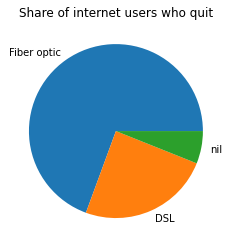

In [263]:
# Check distribution of internet users that quit the service
print(lost_users['internet_service'].value_counts())
labels= ['Fiber optic', 'DSL', 'nil']
plt.pie(lost_users['internet_service'].value_counts(), labels=labels)
plt.title('Share of internet users who quit')
plt.show()

From our chart above, we can see that more fiber optic users quit the service. Users who have no internet subscription make up the least amount of lost users. 

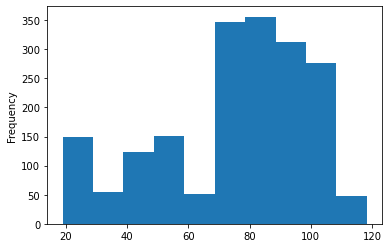

In [262]:
# Check distribution of monthly charges among lost users
lost_users['monthly_charges'].plot(kind='hist', bins= 10)
plt.show()

From the chart above, we can see that users with monthly charges of 70 and above seem to be leaving the service more than those who pay charges below 70

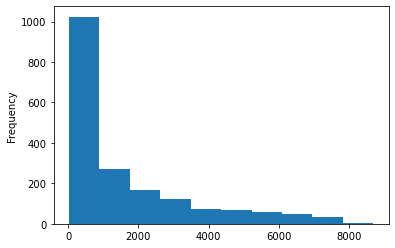

In [261]:
# Check distribution of total charges among lost users
total_charges = lost_users['total_charges'][lost_users['total_charges'] != 'No']
total_charges = total_charges.astype('float')
total_charges.plot(kind='hist', bins= 10)
plt.show()

Ironically, people who have less total charges, make up more of the lost customers

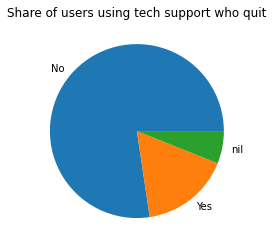

In [260]:
# Check distribution of lost users in users who opted for tech support
lost_users['tech_support'].value_counts()
labels= ['No', 'Yes', 'nil']
plt.pie(lost_users['tech_support'].value_counts(), labels=labels)
plt.title('Share of users using tech support who quit')
plt.show()

From the chart, we can see that the lost users are made up of users who weren't using tech support. Could there be a technical issue with the product?

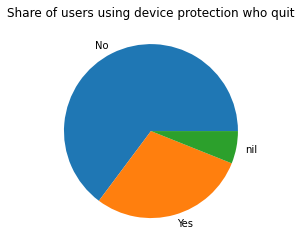

In [259]:
# Check distribution of lost users in users who opted for device protection
lost_users['device_protection'].value_counts()
labels= ['No', 'Yes', 'nil']
plt.pie(lost_users['device_protection'].value_counts(), labels=labels)
plt.title('Share of users using device protection who quit')
plt.show()

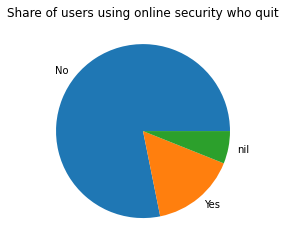

In [258]:
# Check distribution of lost users in users who opted for online security
lost_users['online_security'].value_counts()
labels= ['No', 'Yes', 'nil']
plt.pie(lost_users['online_security'].value_counts(), labels=labels)
plt.title('Share of users using online security who quit')
plt.show()

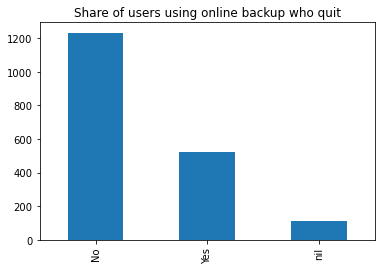

In [257]:
# Check distribution of lost users in users who opted for online backup
lost_users['online_backup'].value_counts()
lost_users['online_backup'].value_counts().plot(kind = 'bar')
plt.title('Share of users using online backup who quit')
plt.show()

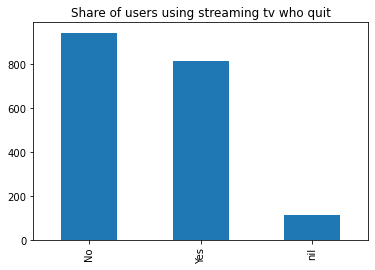

In [256]:
# Check distribution of lost users in users who opted for streaming tv
lost_users['streaming_tv'].value_counts()
lost_users['streaming_tv'].value_counts().plot(kind = 'bar')
plt.title('Share of users using streaming tv who quit')
plt.show()

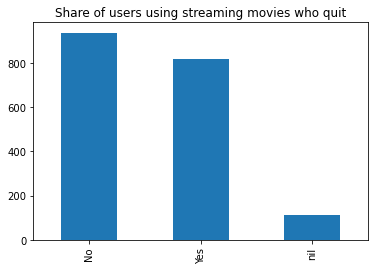

In [255]:
# Check distribution of lost users in users who opted for streaming movies
lost_users['streaming_movies'].value_counts()
lost_users['streaming_movies'].value_counts().plot(kind = 'bar')
plt.title('Share of users using streaming movies who quit')
plt.show()

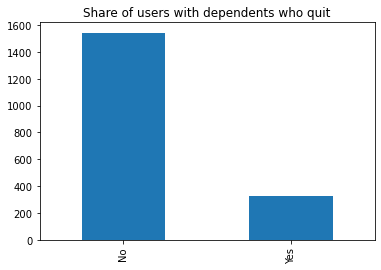

In [254]:
# Check distribution of lost users in users with dependents
lost_users['dependents'].value_counts()
lost_users['dependents'].value_counts().plot(kind = 'bar')
plt.title('Share of users with dependents who quit')
plt.show()

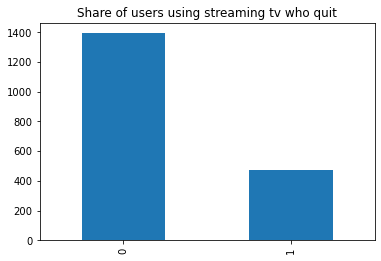

In [253]:
# Check distribution of lost users in users who are senior citizens
lost_users['senior_citizen'].value_counts()
lost_users['senior_citizen'].value_counts().plot(kind = 'bar')
plt.title('Share of users using streaming tv who quit')
plt.show()

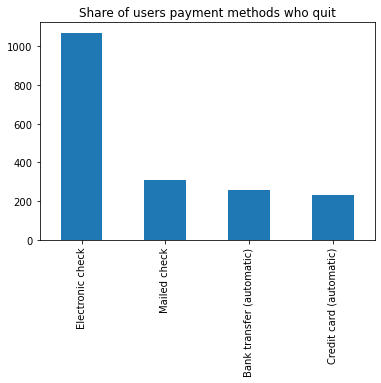

In [252]:
# Check distribution of lost users in users with different payment methods
lost_users['payment_method'].value_counts()
lost_users['payment_method'].value_counts().plot(kind = 'bar')
plt.title('Share of users payment methods who quit')
plt.show()

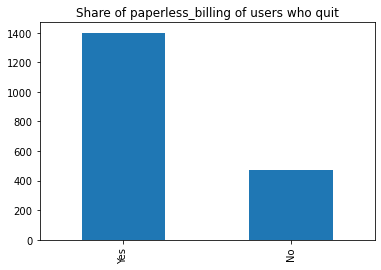

In [251]:
# Check distribution of lost users in users using paperless billing
lost_users['paperless_billing'].value_counts()
lost_users['paperless_billing'].value_counts().plot(kind = 'bar')
plt.title('Share of paperless_billing of users who quit')
plt.show()

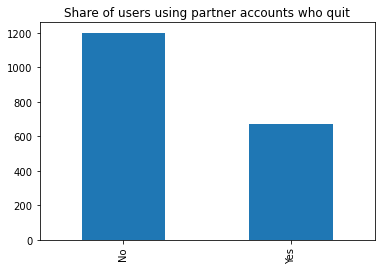

In [250]:
# Check distribution of lost users in users using paperless billing
lost_users['partner'].value_counts()
lost_users['partner'].value_counts().plot(kind = 'bar')
plt.title('Share of users using partner accounts who quit')
plt.show()

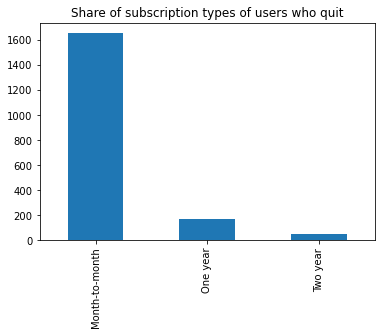

In [249]:
lost_users['type'].value_counts()
lost_users['type'].value_counts().plot(kind = 'bar')
plt.title('Share of subscription types of users who quit')
plt.show()

From the bar chart, we can see that users with month-to-month payment make up the majority of the lost users

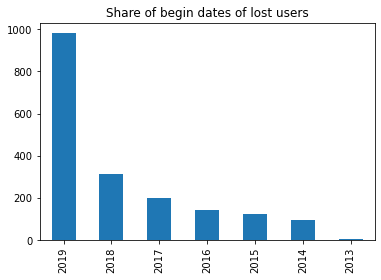

In [247]:
# Check distribution of begin dates of lost users 
lost_users['begin_date'].dt.year.value_counts().plot(kind='bar')
plt.title('Share of begin dates of lost users')
plt.show()

Looks like newer users are leaving the service faster than older users.

### Explore dataset with current users

In [49]:
# Create current users dataset
current_users = df[df['end_date'] == 'No']

In [50]:
# Visualize dataset
display(current_users.head(20))
print(current_users.info())

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,unknown
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,unknown
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,Fiber optic,No,Yes,No,No,Yes,No,Male,0,No,Yes,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9,DSL,Yes,No,No,No,No,No,Female,0,No,No,unknown
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,DSL,Yes,Yes,No,No,No,No,Male,0,No,Yes,No
10,9763-GRSKD,2019-01-01,No,Month-to-month,Yes,Mailed check,49.95,587.45,DSL,Yes,No,No,No,No,No,Male,0,Yes,Yes,No
11,7469-LKBCI,2018-10-01,No,Two year,No,Credit card (automatic),18.95,326.8,nil,nil,nil,nil,nil,nil,nil,Male,0,No,No,No
12,8091-TTVAX,2015-04-01,No,One year,No,Credit card (automatic),100.35,5681.1,Fiber optic,No,No,Yes,No,Yes,Yes,Male,0,Yes,No,Yes
14,5129-JLPIS,2018-01-01,No,Month-to-month,Yes,Electronic check,105.50,2686.05,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Male,0,No,No,No


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5174 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        5174 non-null   object        
 1   begin_date         5174 non-null   datetime64[ns]
 2   end_date           5174 non-null   object        
 3   type               5174 non-null   object        
 4   paperless_billing  5174 non-null   object        
 5   payment_method     5174 non-null   object        
 6   monthly_charges    5174 non-null   float64       
 7   total_charges      5174 non-null   object        
 8   internet_service   5174 non-null   object        
 9   online_security    5174 non-null   object        
 10  online_backup      5174 non-null   object        
 11  device_protection  5174 non-null   object        
 12  tech_support       5174 non-null   object        
 13  streaming_tv       5174 non-null   object        
 14  streamin

DSL            1962
Fiber optic    1799
nil            1413
Name: internet_service, dtype: int64


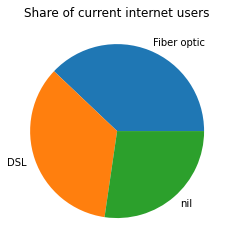

In [246]:
# Check distribution of current internet users 
print(current_users['internet_service'].value_counts())
labels= ['Fiber optic', 'DSL', 'nil']
plt.pie(current_users['internet_service'].value_counts(), labels=labels)
plt.title('Share of current internet users')
plt.show()

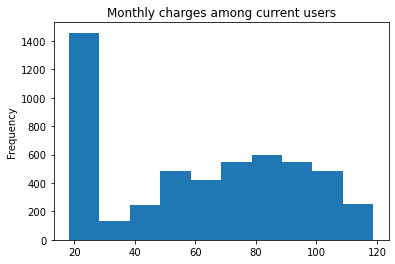

In [245]:
# Check distribution of monthly charges among current users
current_users['monthly_charges'].plot(kind='hist', bins= 10)
plt.title('Monthly charges among current users')
plt.show()

No     2027
Yes    1734
nil    1413
Name: tech_support, dtype: int64

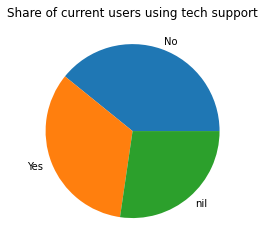

In [244]:
# Check distribution of current users in users who opted for tech support
display(current_users['tech_support'].value_counts())
labels= ['No', 'Yes', 'nil']
plt.pie(current_users['tech_support'].value_counts(), labels=labels)
plt.title('Share of current users using tech support')
plt.show()

No     1884
Yes    1877
nil    1413
Name: device_protection, dtype: int64

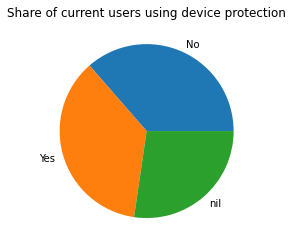

In [243]:
# Check distribution of current users in users who opted for device protection
display(current_users['device_protection'].value_counts())
labels= ['No', 'Yes', 'nil']
plt.pie(current_users['device_protection'].value_counts(), labels=labels)
plt.title('Share of current users using device protection')
plt.show()

No     2037
Yes    1724
nil    1413
Name: online_security, dtype: int64

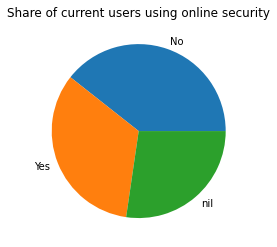

In [242]:
# Check distribution of current users in users who opted for online security
display(current_users['online_security'].value_counts())
labels= ['No', 'Yes', 'nil']
plt.pie(current_users['online_security'].value_counts(), labels=labels)
plt.title('Share of current users using online security')
plt.show()

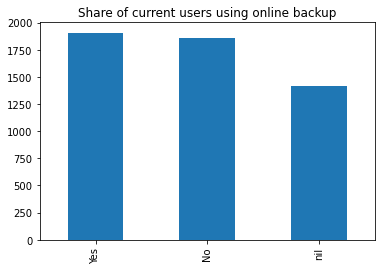

In [241]:
# Check distribution of current users in users who opted for online backup
current_users['online_backup'].value_counts()
current_users['online_backup'].value_counts().plot(kind = 'bar')
plt.title('Share of current users using online backup')
plt.show()

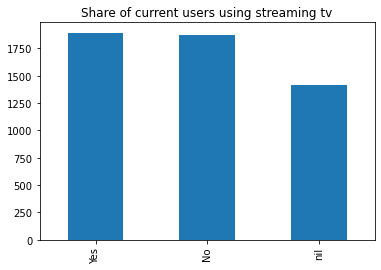

In [240]:
# Check distribution of current users in users who opted for streaming tv
current_users['streaming_tv'].value_counts()
current_users['streaming_tv'].value_counts().plot(kind = 'bar')
plt.title('Share of current users using streaming tv')
plt.show()

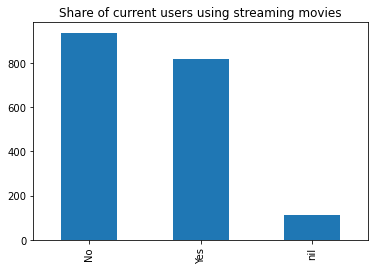

In [239]:
# Check distribution of current users in users who opted for streaming movies
current_users['streaming_movies'].value_counts()
lost_users['streaming_movies'].value_counts().plot(kind = 'bar')
plt.title('Share of current users using streaming movies')
plt.show()

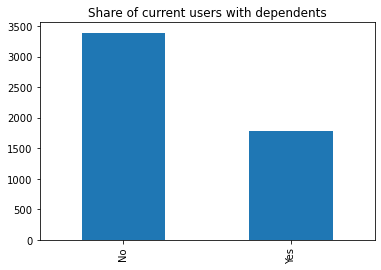

In [238]:
# Check distribution of current users in users with dependents
current_users['dependents'].value_counts()
current_users['dependents'].value_counts().plot(kind = 'bar')
plt.title('Share of current users with dependents')
plt.show()

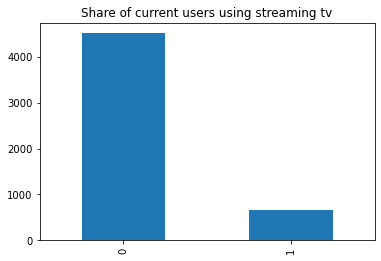

In [237]:
# Check distribution of current users in users who are senior citizens
current_users['senior_citizen'].value_counts()
current_users['senior_citizen'].value_counts().plot(kind = 'bar')
plt.title('Share of current users using streaming tv')
plt.show()

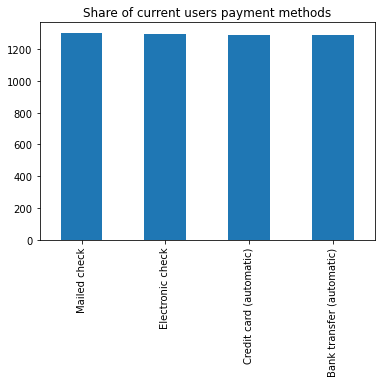

In [236]:
# Check distribution of lost users in users with different payment methods
current_users['payment_method'].value_counts()
current_users['payment_method'].value_counts().plot(kind = 'bar')
plt.title('Share of current users payment methods')
plt.show()

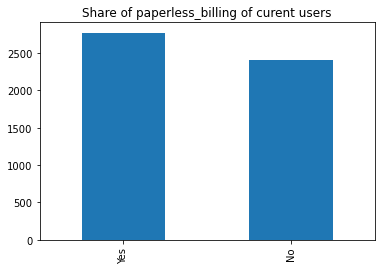

In [234]:
# Check distribution of current users in users using paperless billing
current_users['paperless_billing'].value_counts()
current_users['paperless_billing'].value_counts().plot(kind = 'bar')
plt.title('Share of paperless_billing of curent users')
plt.show()

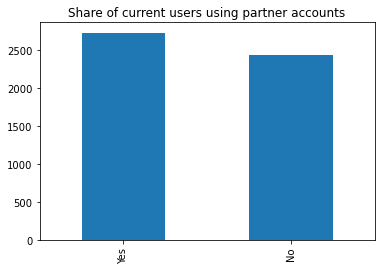

In [233]:
# Check distribution of current users in users using partner accounts
current_users['partner'].value_counts()
current_users['partner'].value_counts().plot(kind = 'bar')
plt.title('Share of current users using partner accounts')
plt.show()

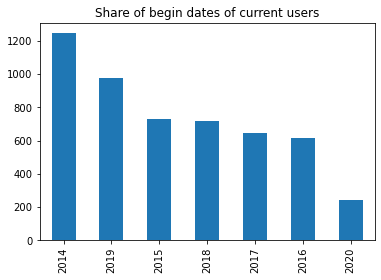

In [248]:
# Check distribution of begin dates of current users 
current_users['begin_date'].dt.year.value_counts().plot(kind='bar')
plt.title('Share of begin dates of current users')
plt.show()

The dataset with current users is not really remarkable. Most of the observations are even. We will rely mostly on the lost users dataset to identify patterns.

## Working with models

### Target column

In [65]:
# Create target column
target_val = []
for item in df['end_date']:
    if item == 'No':
        target_val.append(1)
    else:
        target_val.append(0)
df['target'] = pd.Series(target_val)

In [ ]:
# Visualize target column
df['target']

In [284]:
# Check distribution of target values
df['target'].value_counts()

1    5174
0    1869
Name: target, dtype: int64

### Useless columns

In [265]:
# Drop columns which are not useful for the task
ml_df = df.drop(['customer_id','begin_date', 'end_date', 'gender'], axis=1)

In [266]:
# Create seperate dataframe for linear regression
lr_df = ml_df.copy()

### Encoding

#### Ordinal Encoding

In [267]:
# Encode categorical columns on ml_df
categorical = list(ml_df.drop(['monthly_charges', 'target', 'total_charges', 'senior_citizen'], axis=1).columns)
encoder = OrdinalEncoder()
ml_df[categorical] = encoder.fit_transform(ml_df[categorical])

In [268]:
# Visualize dataframe
ml_df

,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,senior_citizen,partner,dependents,multiple_lines,target,begin_year
0,0.0,1.0,2.0,29.85,29.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0.0,2.0,1,7.0
1,1.0,0.0,3.0,56.95,1889.50,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,4.0
2,0.0,1.0,3.0,53.85,108.15,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,6.0
3,1.0,0.0,0.0,42.30,1840.75,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0.0,0.0,2.0,1,3.0
4,0.0,1.0,2.0,70.70,151.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,3.0,84.80,1990.50,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,1,5.0
7039,1.0,1.0,1.0,103.20,7362.90,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0,1.0,1.0,1.0,1,1.0
7040,0.0,1.0,2.0,29.60,346.45,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,2.0,1,6.0
7041,0.0,1.0,3.0,74.40,306.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,1.0,0,6.0


#### One-Hot-Encoding (OHE)

In [269]:
# Encode categorical columns on lr_df
lr_df = pd.get_dummies(lr_df, columns=categorical)

In [270]:
# Visualize dataframe
lr_df

,monthly_charges,total_charges,senior_citizen,target,type_Month-to-month,type_One year,type_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),...,multiple_lines_Yes,multiple_lines_unknown,begin_year_2013,begin_year_2014,begin_year_2015,begin_year_2016,begin_year_2017,begin_year_2018,begin_year_2019,begin_year_2020
0,29.85,29.85,0,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,56.95,1889.50,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,53.85,108.15,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,42.30,1840.75,0,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
4,70.70,151.65,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
7039,103.20,7362.90,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
7040,29.60,346.45,0,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
7041,74.40,306.60,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


### Split dataset

In [271]:
# Split dataset into train and test datasets
train, test = train_test_split(ml_df, test_size=0.20, random_state=12345)

lr_train, lr_test = train_test_split(lr_df, test_size=0.20, random_state=12345)

In [272]:
# Create validation dataset
train, valid = train_test_split(train, test_size=0.25, random_state=12345)

lr_train, lr_valid = train_test_split(lr_train, test_size=0.25, random_state=12345)

In [273]:
# Create features and targets
features_train = train.drop('target', axis=1)
target_train = train['target']

features_valid = valid.drop('target', axis=1)
target_valid = valid['target']

features_test = test.drop('target', axis=1)
target_test = test['target']

In [274]:
# Create features and targets for lr model
lr_features_train = lr_train.drop('target', axis=1)
lr_target_train = lr_train['target']

lr_features_valid = lr_valid.drop('target', axis=1)
lr_target_valid = lr_valid['target']

lr_features_test = lr_test.drop('target', axis=1)
lr_target_test = lr_test['target']

### Scaling

In [275]:
# Scale numeric columns on ml_df
numeric = ['monthly_charges', 'total_charges']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [276]:
# Visualize df
features_train

,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,senior_citizen,partner,dependents,multiple_lines,begin_year
940,1.0,0.0,0.0,-1.472489,-0.784685,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0.0,1.0,0.0,5.0
410,0.0,1.0,2.0,0.534218,-0.916995,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,6.0
2079,0.0,1.0,2.0,1.356203,2.334827,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,1.0,1.0,1.0,1.0
4076,2.0,1.0,1.0,1.133235,2.064055,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0,1.0,0.0,1.0,1.0
2762,2.0,0.0,0.0,1.131571,0.095731,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,0.0,1.0,0.0,-0.174619,-0.471690,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0.0,0.0,0.0,5.0
2091,2.0,0.0,1.0,-1.502440,-0.589540,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0.0,1.0,0.0,2.0
3858,1.0,1.0,0.0,0.720579,0.817760,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,3.0
1085,0.0,1.0,2.0,0.299603,-0.603089,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,0.0,5.0


### Create Scorer

In [277]:
# Create scorer
scorer = make_scorer(roc_auc_score)

### Upsampling

In [286]:
# Create upsample formula
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_ones] + [features_zeros] * repeat)
    target_upsampled = pd.concat([target_ones] + [target_zeros] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [293]:
# Upsample negative observations
features_upsampled, target_upsampled = upsample(features_train,target_train, 3)

lr_features_upsampled, lr_target_upsampled = upsample(lr_features_train,lr_target_train, 3)

In [295]:
# Check distribution of target values
target_upsampled.value_counts()

0    3411
1    3088
Name: target, dtype: int64

### Model Training

#### Logistic regression

In [296]:
# Create model
lr_model = LogisticRegression(random_state=12345)
lr_model.fit(lr_features_upsampled, lr_target_upsampled)

probabilities_valid = lr_model.predict_proba(lr_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

lr_result = roc_auc_score(target_valid, probabilities_one_valid)

print('ROC AUC Score:', lr_result)

ROC AUC Score: 0.8314957292471457


C:\Users\harve\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Random Forest

In [297]:
rf_model = None
estimators = 0
depth = 0
score = 0
for d in range(1,100,10):
    for e in range(1, 100, 10):
        model = RandomForestClassifier(n_estimators=e, max_depth=d, random_state=12345)
        model.fit(features_upsampled, target_upsampled)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result = roc_auc_score(target_valid, probabilities_one_valid)
        if result > score:
            rf_model = model
            estimators = e
            depth = d
            score = result

print(f'max_depth = {depth}, n_estimators= {estimators}')
print()
print('ROC AUC Score:', score)

max_depth = 11, n_estimators= 91

ROC AUC Score: 0.851606092797665


#### Cat Boost  

In [298]:
cb_model = None
iterations = 0
score_2 = 0
for l in range(1, 500, 50):
    model_2 = CatBoostClassifier(random_seed=12345, iterations=l, verbose=0)
    model_2.fit(features_upsampled, target_upsampled)
    probabilities_valid = model_2.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_2 = roc_auc_score(target_valid, probabilities_one_valid)
    if result_2 > score_2:
        cb_model = model_2
        score_2 = result_2
        iterations = l
print(f'iterations = {iterations}')
print()
print('ROC AUC Score:', score_2)

iterations = 101

ROC AUC Score: 0.8671962185595331


Looking at the results, the catboost model has the highest ROC-AUC Score. We will use this as our best model and evaluate it with the test dataset 

### Model Analysis

In [300]:
probabilities_test = cb_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print('ROC AUC Score:', roc_auc_score(target_test, probabilities_one_test))

ROC AUC Score: 0.885234521095371


The model has an ROC-AUC Score of 0.885 which is pretty accurate for our task.

## Solution Report

The model has finally been created with a good ROC-AUC Score. In creating this model I went through all the stages I highlighted in the work plan. The EDA was particularly interesting because I was able to identify different trends and behaviours of the customers which made me understand exactly what features I needed to give the model to get a good output.

The only difficulty I faced was in getting the ROC-AUC Score high enough to ensure a quality model. I initially didn't take the begin date into account because this wasn't a time series task but after going thrugh my EDA reports I quickly realised an important trend in the data which showed that newer customers made up the majority of the lost users. So I extracted the year value from the dates and this really increased my model's efficiency.

Some of the most important aspects of this project were the EDA and the preprocessing. Every other aspect was dependent on these two. 

My final model is a gradient boosting model, catboost. I chose this model because it helps to reduce error while going down the gradient in the task thereby increasing accuracy of the model. The model was able to achieve an ROC-AUC score of 0.885 which was greater than the other models thus making it the best model for this task.